# Neural Network Predictions

In this section of the project, the neural networks (For each group of features dataAP, dataPHY and dataALL) defined with the hyperparameters chosen with keras tuner, will be evaluated.

## Loading the libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataframes dataAP and dataPHY:

- dataAP: data containing the original variables that best correlate with the label data of the dataframe.

- dataPHY: data containing variables from the blood test that are of interest.

- dataALL: Both dataAP and dataPHY combined

In [ ]:
#Importing dataAP
file_name = '/content/drive/MyDrive/TFG/dataAP.csv'
dataAP = pd.read_csv(file_name, index_col=[0])

In [ ]:
#Importing dataPHY
file_name = '/content/drive/MyDrive/TFG/dataPHY.csv'
dataPHY = pd.read_csv(file_name, index_col=[0])

In [ ]:
#Importing dataALL
file_name = '/content/drive/MyDrive/TFG/dataALL.csv'
dataALL = pd.read_csv(file_name, index_col=[0])

In [ ]:
import time

In [ ]:
!pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch, Hyperband
import tensorflow as tf
import IPython
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<ipython-input-8-091a60f0002a>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


One dataframe (**dataAP_g**) will contain the label data in continuous form (Masa_VAT_g) and the other (**dataAP_cat**) will contain the label in
categorical form (Masa_VAT_cat), as stated in the "*Transorming the label data into categotical data*" section from the preprocessing. This is done to avoid confusion when selecting the target variable (Masa_VAT_cat).

Also the label Vol_VAT will be removed as it is technically the same as Masa_VAT.

In [ ]:
#Creating a dataAP dataframe only with Masa_VAT_g and another one with only Masa_VAT_cat

dataAP_g = dataAP.copy()
dataAP_cat = dataAP.copy()

dropcat = ["Masa_VAT_g", "Vol_VAT"]
dropg = ["Masa_VAT_cat", "Vol_VAT"]
dataAP_g = dataAP_g.drop(dropg, axis=1)
dataAP_cat = dataAP_cat.drop(dropcat , axis=1)

#And deleting all the label data from dataALL
dropALL = ["Masa_VAT_cat", "Masa_VAT_g", "Vol_VAT"]
dataALL = dataALL.drop(dropALL, axis=1)

Separating the features X from the label y, next we have the three possible X and y depending on the database we're going to work with

In [ ]:
#DATA AP NN
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataAP_g.drop(target, axis=1).values
y = dataAP_g[target].values	

In [ ]:
#DATA PHY NN
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataPHY.values
y = dataAP_g[target].values	

In [ ]:
#DATA ALL NN
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataALL.values
y = dataAP_g[target].values	

Train-Validation-Test Split

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can use X_train and y_train as your training data
# and X_test and y_test as your test data

In [ ]:
print(X_train.shape)
print(y_train.shape)

(118, 33)
(118, 1)


# Defining the NN with the hyperparameters found with keras tuner. dataAP



In [ ]:
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataAP_g.drop(target, axis=1).values
y = dataAP_g[target].values	

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can use X_train and y_train as your training data
# and X_test and y_test as your test data

In [ ]:
print(X_train.shape)
print(y_train.shape)

(118, 17)
(118, 1)


In [ ]:

model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape= (17,)))
model2.add(tf.keras.layers.Dropout(0))
model2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.009925419577869306), metrics= ['mae','mse'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


Training the model, using early stopping

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= model2.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model2.evaluate(X_test, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286

Epoch 54: early stopping
1/1 - 0s - loss: 0.0242 - mae: 0.1312 - mse: 0.0242 - 39ms/epoch - 39ms/step
Test-set Mean absolute error:  0.13


Plotting the loss function of the training set. ?????

Text(0.5, 1.0, 'Train - MAE')

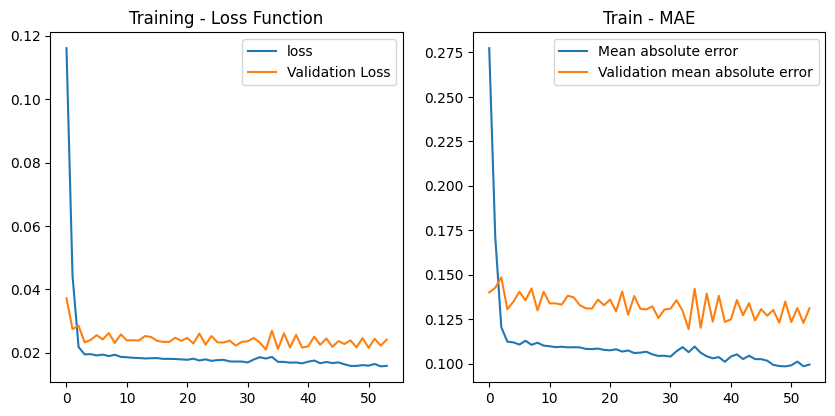

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

## Visual representation of the predictions vs the actual values of the test set.

1/1 [==============================] - 0s 128ms/step


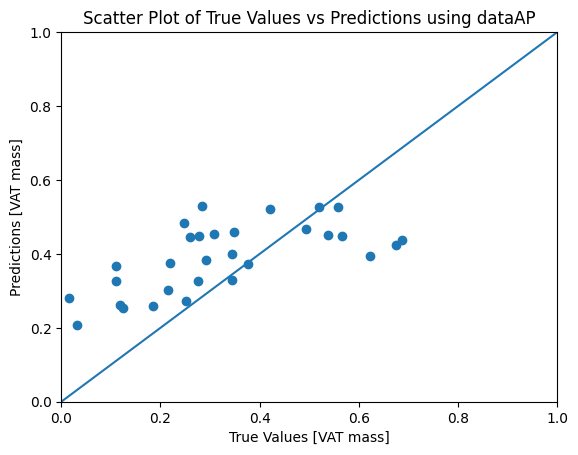

In [ ]:
y_pred_test= model2.predict(X_test).flatten()  # SHOULD I USE FLATTEN???

# a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [VAT mass]')
plt.ylabel('Predictions [VAT mass]')
plt.title('Scatter Plot of True Values vs Predictions using dataAP')

lims=[0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

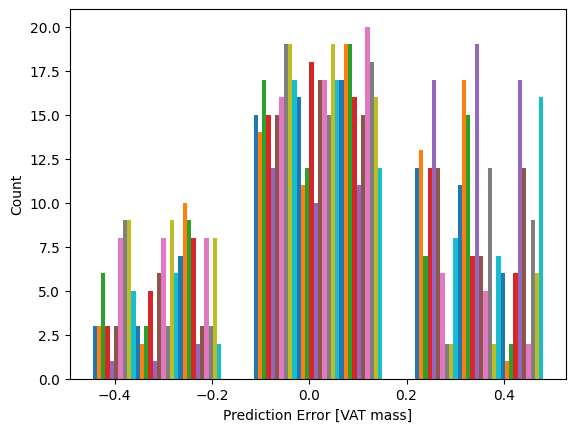

In [ ]:
error= y_pred_test-y_test
plt.hist(error, bins=3)
plt.xlabel('Prediction Error [VAT mass]')
_=plt.ylabel('Count')

In [ ]:
# Accuracy metrics :

y_pred_train= model2.predict(X_train)
y_pred_test= model2.predict(X_test)

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test)))


1/1 [==============================] - 0s 36ms/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.3879826572288748
Test accuracy:  0.27526979481736147
Test mean-squared error:  0.1555394909533318


## K-fold cross-validation to calculate average R2 of the training and testing dataset, as well as the Mean Squared Error or the prediction.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Assuming X contains the input features and y contains the corresponding labels

# Initialize performance metrics
train_r2_scores = []
test_r2_scores = []
test_mse_scores = []

# Configure the neural network _> model2

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)  # Number of folds and shuffle option
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the neural network
    model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the training and test data
    y_pred_train = model2.predict(X_train)
    y_pred_test = model2.predict(X_test)

    # Calculate R2 score for training and test data
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # Calculate MSE for test data
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mse_scores.append(test_mse)

# Calculate average scores
average_train_r2 = np.mean(train_r2_scores)
average_test_r2 = np.mean(test_r2_scores)
average_test_mse = np.mean(test_mse_scores)

print("Average Training R2 Score:", average_train_r2)
print("Average Test R2 Score:", average_test_r2)
print("Average Test MSE:", np.sqrt(average_test_mse))


1/1 [==============================] - 0s 45ms/step
Average Training R2 Score: 0.39707046894262504
Average Test R2 Score: 0.28825981746890256
Average Test MSE: 0.13915981275283631


## NN architecture

Installing necessary libraries for the visual representation

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
from keras.utils import plot_model

Plotting the model with keras.utils

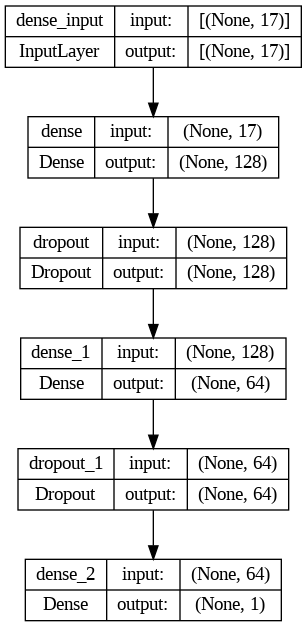

In [ ]:
plot_model(model2, to_file='model_architecture.png', show_shapes=True)

Visualizing NN architecture with ann_visualizer

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=409cfa7ea21adbd268ebd2201b21a0b82b2df39952fbd0e140b3ceb6da9d744f
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
from keras.models import Sequential
from keras.layers import Dense

Saving the visual representation in my personal drive

In [ ]:
ann_viz(model2, view=True, filename="/content/drive/MyDrive/TFG/Colab Notebooks/NN architecture with dataAP features as input neurons", title="NN architecture with dataAP features as input neurons")

# Defining the NN with the hyperparameters found with keras tuner. dataPHY



In [ ]:
#DATA PHY NN
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataPHY.values
y = dataAP_g[target].values	

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can use X_train and y_train as your training data
# and X_test and y_test as your test data

In [ ]:
print(X_train.shape)
print(y_train.shape)

(118, 16)
(118, 1)


In [ ]:
model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=160, activation='relu', input_shape= (16,)))
model2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.008906590847847421), metrics= ['mae','mse'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 160)               2720      
                                                                 
 dense_4 (Dense)             (None, 64)                10304     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


Training the model, using early stopping

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= model2.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model2.evaluate(X_test, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286

Epoch 48: early stopping
1/1 - 0s - loss: 0.0213 - mae: 0.1199 - mse: 0.0213 - 45ms/epoch - 45ms/step
Test-set Mean absolute error:  0.12


Plotting the loss function of the training set. ?????

Text(0.5, 1.0, 'Train - MAE')

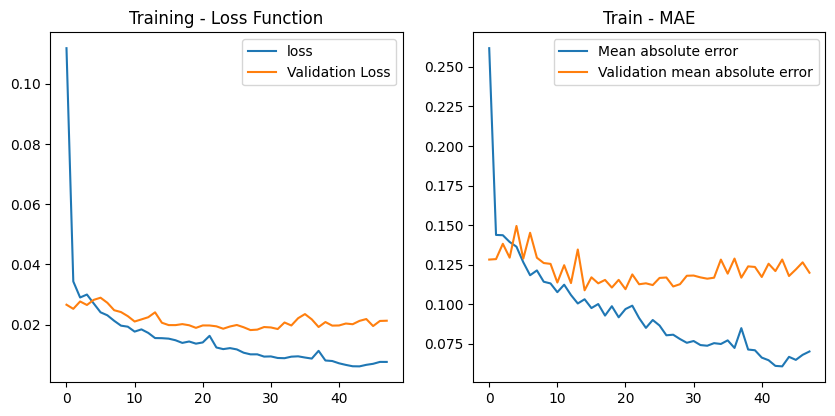

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

## Visual representation of the predictions vs the actual values of the test set.

1/1 [==============================] - 0s 102ms/step


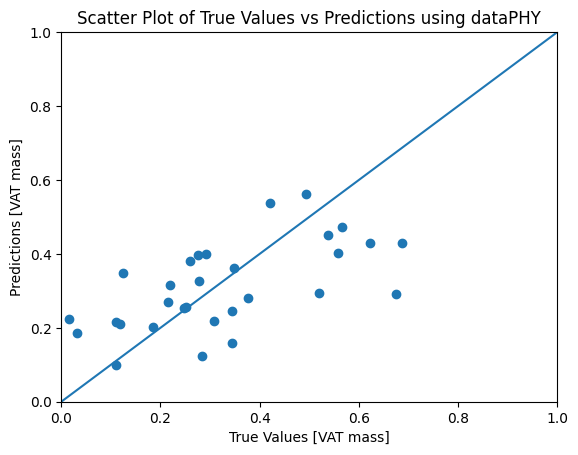

In [ ]:
y_pred_test= model2.predict(X_test).flatten()  # SHOULD I USE FLATTEN???

# a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [VAT mass]')
plt.ylabel('Predictions [VAT mass]')
plt.title('Scatter Plot of True Values vs Predictions using dataPHY')

lims=[0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

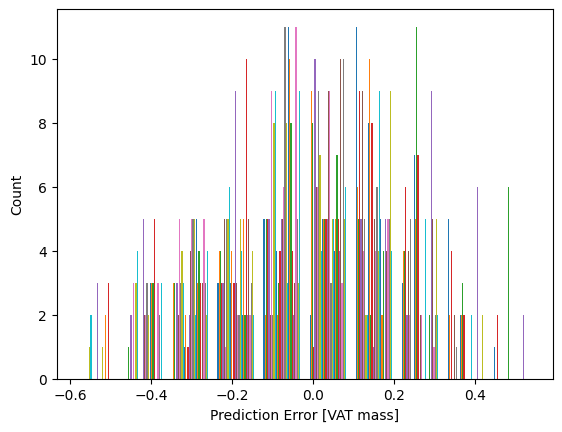

In [ ]:
error= y_pred_test-y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [VAT mass]')
_=plt.ylabel('Count')

In [ ]:
# Accuracy metrics :

y_pred_train= model2.predict(X_train)
y_pred_test= model2.predict(X_test)

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training R2: ",r2_score(y_train, y_pred_train))

print("Test R2:",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test)))


1/1 [==============================] - 0s 38ms/step
Accuracy obtained using x_train and x_val sets from the original x!
Training R2:  0.7549414939397447
Test R2: 0.36139725409865764
Test mean-squared error:  0.14600505189909538


## K-fold cross-validation to calculate average R2 of the training and testing dataset, as well as the Mean Squared Error or the prediction.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Assuming X contains the input features and y contains the corresponding labels

# Initialize performance metrics
train_r2_scores = []
test_r2_scores = []
test_mse_scores = []

# Configure the neural network _> model2

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)  # Number of folds and shuffle option
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the neural network
    model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the training and test data
    y_pred_train = model2.predict(X_train)
    y_pred_test = model2.predict(X_test)

    # Calculate R2 score for training and test data
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # Calculate MSE for test data
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mse_scores.append(test_mse)

# Calculate average scores
average_train_r2 = np.mean(train_r2_scores)
average_test_r2 = np.mean(test_r2_scores)
average_test_mse = np.mean(test_mse_scores)

print("Average Training R2 using k-cross val:", average_train_r2)
print("Average Test R2 using k-cross val:", average_test_r2)
print("Average Test MSE using k-cross val:", np.sqrt(average_test_mse))


1/1 [==============================] - 0s 22ms/step
Average Training R2 using k-cross val: 0.8090425778823033
Average Test R2 using k-cross val: 0.6741543329815105
Average Test MSE using k-cross val: 0.09387483015903254


## NN architecture

Installing necessary libraries for the visual representation

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
from keras.utils import plot_model

Plotting the model with keras.utils

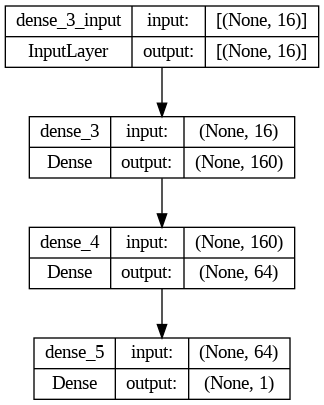

In [ ]:
plot_model(model2, to_file='model_architecture.png', show_shapes=True)

Visualizing NN architecture with ann_visualizer

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz
from keras.models import Sequential
from keras.layers import Dense

Saving the visual representation in my personal drive

In [ ]:
ann_viz(model2, view=True, filename="/content/drive/MyDrive/TFG/Colab Notebooks/NN architecture with dataPHY features as input neurons", title="NN architecture with dataPHY features as input neurons")

# Defining the NN with the hyperparameters found with keras tuner. dataALL



In [ ]:
# #And deleting all the label data from dataALL (just in case)
# dropALL = ["Masa_VAT_cat", "Masa_VAT_g", "Vol_VAT"]
# dataALL = dataALL.drop(dropALL, axis=1)

KeyError: ignored

In [ ]:
#DATA ALL NN
#Separating the target variables (Masa_VAT_g and Vol_VAT) from the independent features
target = ["Masa_VAT_g"]
X = dataALL.values
y = dataAP_g[target].values	

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can use X_train and y_train as your training data
# and X_test and y_test as your test data

In [ ]:
print(X_train.shape)
print(y_train.shape)

(118, 33)
(118, 1)


In [ ]:
model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=160, activation='relu', input_shape= (33,)))
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.0011308887902852964), metrics= ['mae','mse'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 160)               5440      
                                                                 
 dense_10 (Dense)            (None, 128)               20608     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 26,177
Trainable params: 26,177
Non-trainable params: 0
_________________________________________________________________


Training the model, using early stopping

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= model2.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model2.evaluate(X_test, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286

Epoch 42: early stopping
1/1 - 0s - loss: 0.0142 - mae: 0.0955 - mse: 0.0142 - 25ms/epoch - 25ms/step
Test-set Mean absolute error:  0.10


Plotting the loss function of the training set. ?????

Text(0.5, 1.0, 'Train - MAE')

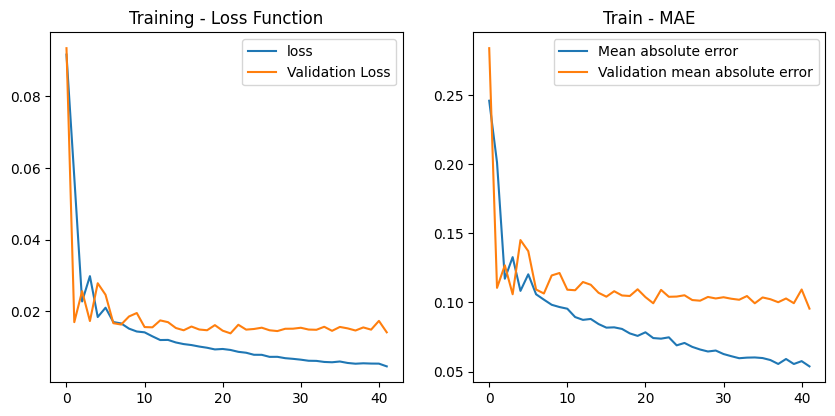

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

## Visual representation of the predictions vs the actual values of the test set.

1/1 [==============================] - 0s 66ms/step


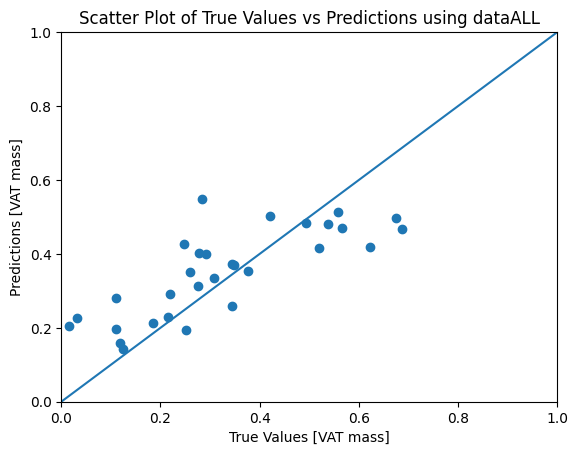

In [ ]:
y_pred_test= model2.predict(X_test).flatten()  # SHOULD I USE FLATTEN???

# a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [VAT mass]')
plt.ylabel('Predictions [VAT mass]')
plt.title('Scatter Plot of True Values vs Predictions using dataALL')

lims=[0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

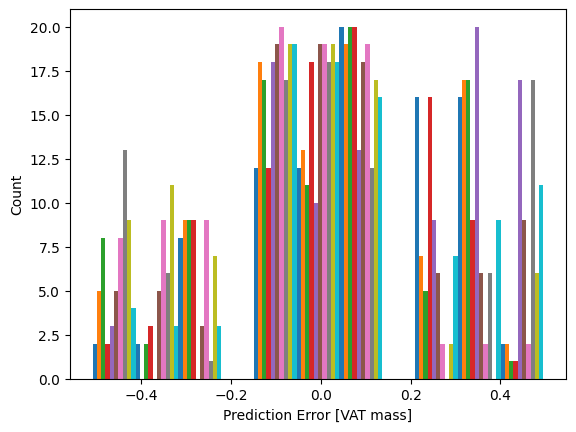

In [ ]:
error= y_pred_test-y_test
plt.hist(error, bins=3)
plt.xlabel('Prediction Error [VAT mass]')
_=plt.ylabel('Count')

In [ ]:
# Accuracy metrics :

y_pred_train= model2.predict(X_train)
y_pred_test= model2.predict(X_test)

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test)))

1/1 [==============================] - 0s 21ms/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.7932233333535418
Test accuracy:  0.5758312423127967
Test mean-squared error:  0.11899311422877047


## K-fold cross-validation to calculate average R2 of the training and testing dataset, as well as the Mean Squared Error or the prediction.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Assuming X contains the input features and y contains the corresponding labels

# Initialize performance metrics
train_r2_scores = []
test_r2_scores = []
test_mse_scores = []

# Configure the neural network _> model2

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)  # Number of folds and shuffle option
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the neural network
    model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the training and test data
    y_pred_train = model2.predict(X_train)
    y_pred_test = model2.predict(X_test)

    # Calculate R2 score for training and test data
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # Calculate MSE for test data
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mse_scores.append(test_mse)

# Calculate average scores
average_train_r2 = np.mean(train_r2_scores)
average_test_r2 = np.mean(test_r2_scores)
average_test_mse = np.mean(test_mse_scores)

print("Average Training R2 Score:", average_train_r2)
print("Average Test R2 Score:", average_test_r2)
print("Average Test MSE:", np.sqrt(average_test_mse))


1/1 [==============================] - 0s 25ms/step
Average Training R2 Score: 0.9062847380391433
Average Test R2 Score: 0.8137116549664111
Average Test MSE: 0.07046363442237355


## NN architecture

Installing necessary libraries for the visual representation

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
from keras.utils import plot_model

Plotting the model with keras.utils

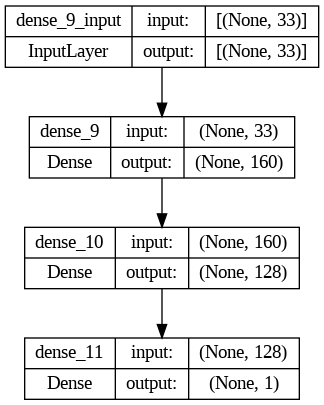

In [ ]:
plot_model(model2, to_file='model_architecture.png', show_shapes=True)

Visualizing NN architecture with ann_visualizer

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz
from keras.models import Sequential
from keras.layers import Dense

Saving the visual representation in my personal drive

In [ ]:
ann_viz(model2, view=True, filename="/content/drive/MyDrive/TFG/Colab Notebooks/NN architecture with dataALL features as input neurons", title="NN architecture with dataALL features as input neurons")